In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Define a function to encode Credit_Score variables into numerical values using a mapping dictionary.
def custom_encoding(y):
    """
    Encode Credit_Score variables into numerical values using a mapping dictionary.
    
    Parameters:
    y (Series): A pandas Series containing the Credit_Score variables to be encoded.
    
    Returns:
    Series: A new Series with encoded numerical values.
    """
    mapping = {
        "Standard": 1,
        "Good": 2,
        "Poor": 0,
        "Bad": 0,
        'NM': 0,
        "No": 1,
        "Yes": 2
    }
    y = y.map(mapping)
    return y

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('credit_score_clean_extraction.csv')

# Define a list of features to be used for analysis
features = ['Credit_Mix', 'Total_Financial_Obligations', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Loan_Interaction']

# Encode the "Credit_Score" variables into numerical values using the custom_encoding function
y = custom_encoding(df["Credit_Score"])


 The `out_liar` function detects and removes outliers from a given column of data. It calculates the first and third quartiles, interquartile range, and upper and lower bounds for outliers. It then counts the number of outliers in the column and replaces them with the appropriate bound value. The function then returns the cleaned column data.

In [5]:
def out_liar(column_data):
    """
    Detect and handle outliers in a given column of data.
    
    Parameters:
    column_data (Series): A pandas Series containing the column data with potential outliers.
    
    Returns:
    Tuple[Series, List]: A tuple containing the modified column data with outliers replaced by the upper/lower bounds 
                         and a list of indices of detected outliers.
    """
    # Calculate quartiles and interquartile range
    Q1 = column_data.quantile(0.25)  # First quartile
    Q3 = column_data.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Calculate upper and lower bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    upper_outliers = column_data[column_data > upper_bound]
    lower_outliers = column_data[column_data < lower_bound]
    
    # Count the number of outliers
    count_outliers = upper_outliers.count() + lower_outliers.count()
    
    # Store the indices of all detected outliers
    all_outlier_indices = list(upper_outliers.index.append(lower_outliers.index))
    
    if count_outliers > 0:
        # Visualize the outliers using a boxplot
        color = '#6CE5E8'  # Color for the boxplot
        sns.boxplot(column_data, orient='v', color=color)
        plt.title(column_data.name)  # Set the title of the boxplot
        
        # Display the number of outliers on the plot
        plt.text(0.8, 0.9, f"Outliers: {count_outliers}", fontsize=12, transform=plt.gca().transAxes)
        
        plt.show()  # Show the boxplot
        
        # Replace outliers with the upper/lower bounds
        column_data = column_data.apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
        
        # Visualize the data after removing outliers
        plt.title(column_data.name)  # Set the title of the boxplot
        sns.boxplot(column_data, orient='v', color=color)
        plt.show()  # Show the boxplot after removing outliers
    
    return column_data, all_outlier_indices

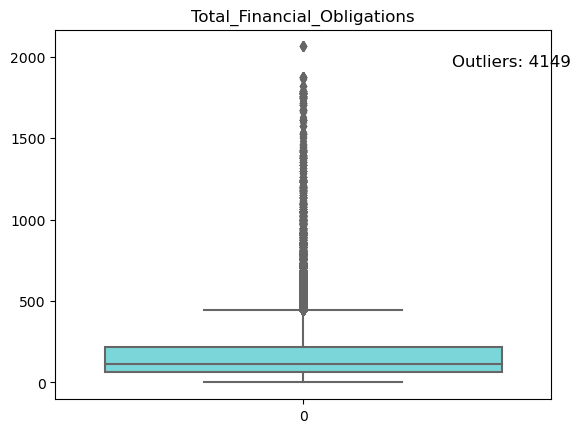

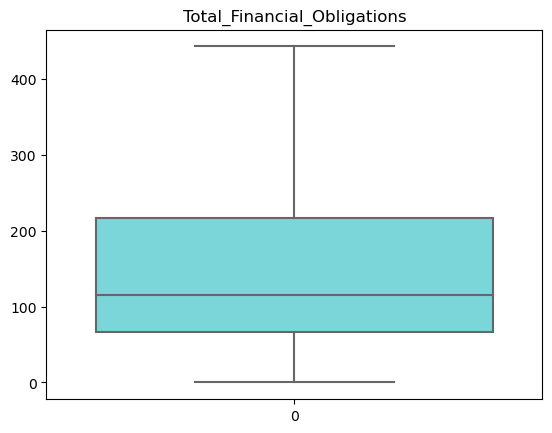

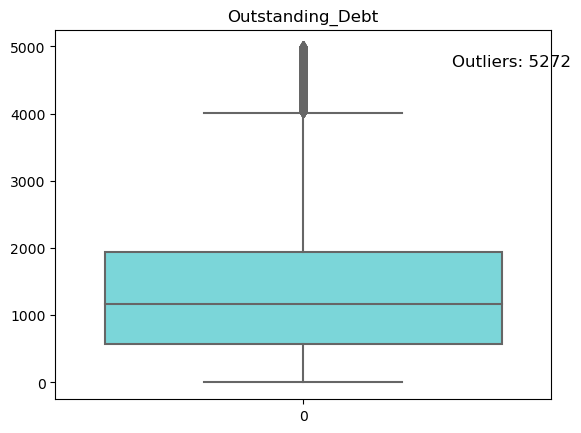

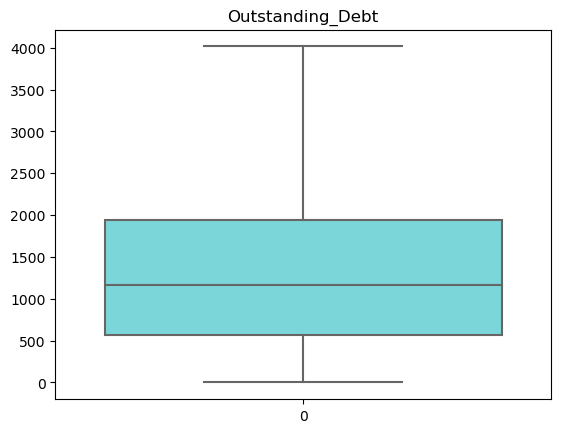

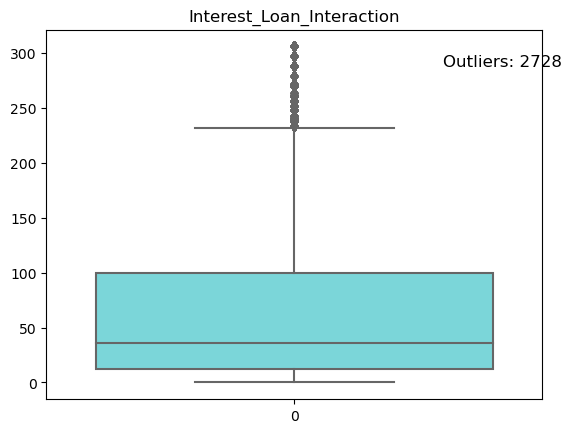

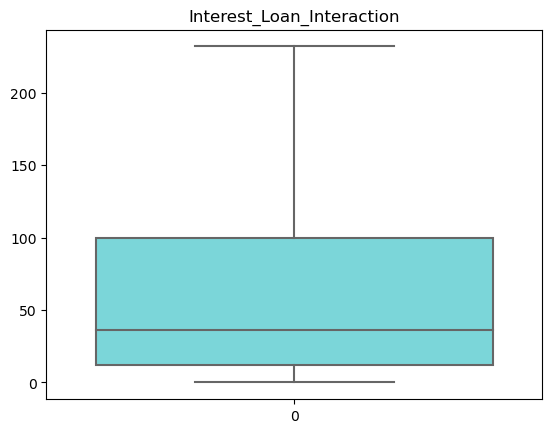

In [6]:
# Detect and handle outliers for each feature in the 'features' list
all_outliers = []  # List to store indices of all detected outliers

for feature in features:
    df[feature], indices = out_liar(df[feature])
    all_outliers += indices

# 'all_outliers' now contains indices of all detected outliers across all specified features


In [10]:
# Calculate the number of unique outliers (without duplicates)
unique_outliers_count = len(set(all_outliers))
print(unique_outliers_count)

10798


In [8]:
# Select the features from the DataFrame
x = df[features]

# Initialize the StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform the features using the StandardScaler
scaled_data = scaler.fit_transform(x)


In [21]:
# Convert the scaled data to a DataFrame with column names from 'features'
scaled_data = pd.DataFrame(scaled_data, columns=features)

# Add the 'Credit_Score' column to the scaled data
scaled_data['Credit_Score'] = y

# Save the scaled data to a CSV file without including the index
scaled_data.to_csv('../csv/scaled_data.csv', index=False)
